In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import os
os.chdir('../')
from function import make_data

In [3]:
df_2 = pd.read_csv('./pn500.csv')

In [4]:
dx = np.diff(df_2['V2'], axis=0)

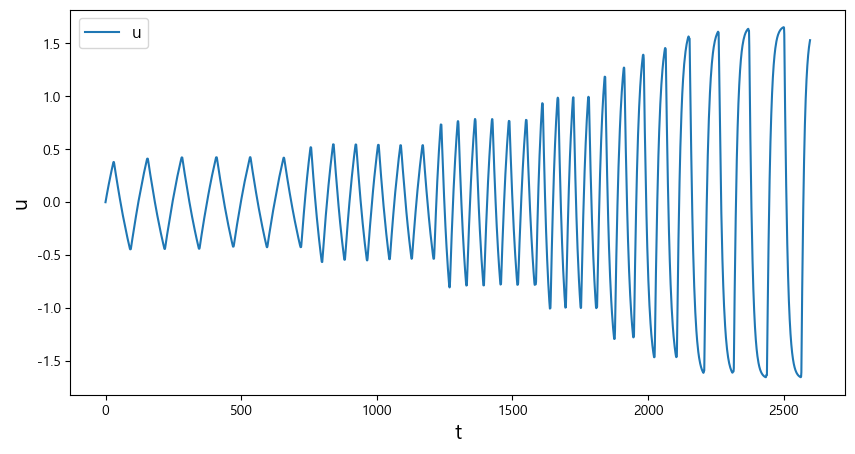

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(df_2['V2'], label = 'u')
plt.ylabel('u', fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

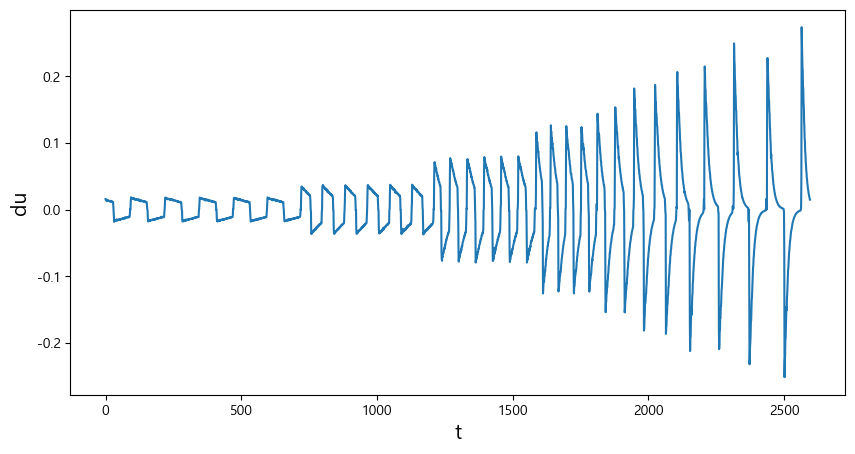

In [6]:
plt.figure(figsize = (10, 5))
plt.plot(dx)
plt.ylabel('du', fontsize = 15)
plt.xlabel('t', fontsize = 15)
plt.show()

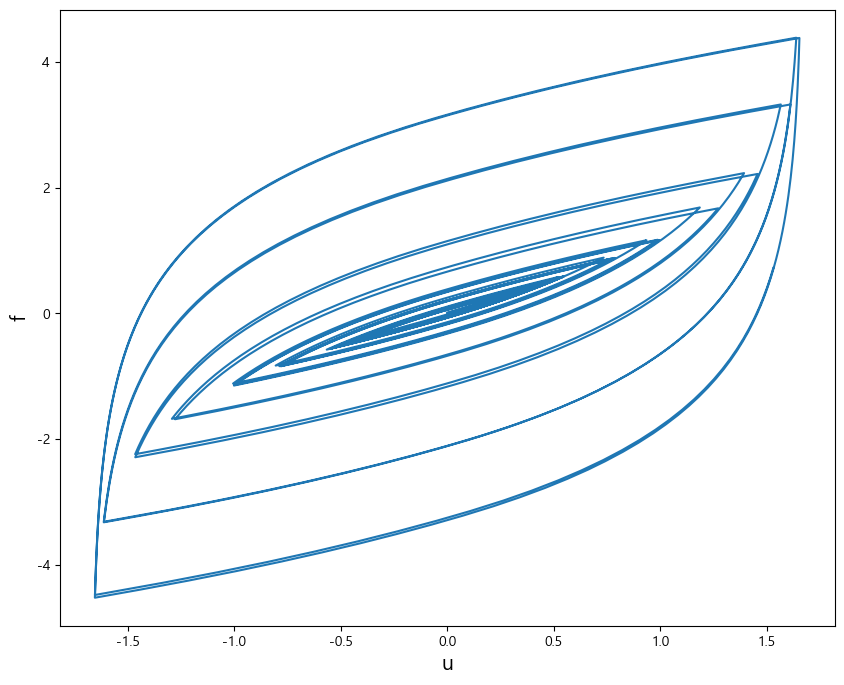

In [7]:
plt.figure(figsize = (10,8))
plt.plot(df_2['V2'], df_2['V1'])
plt.xlabel('u', fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.show()

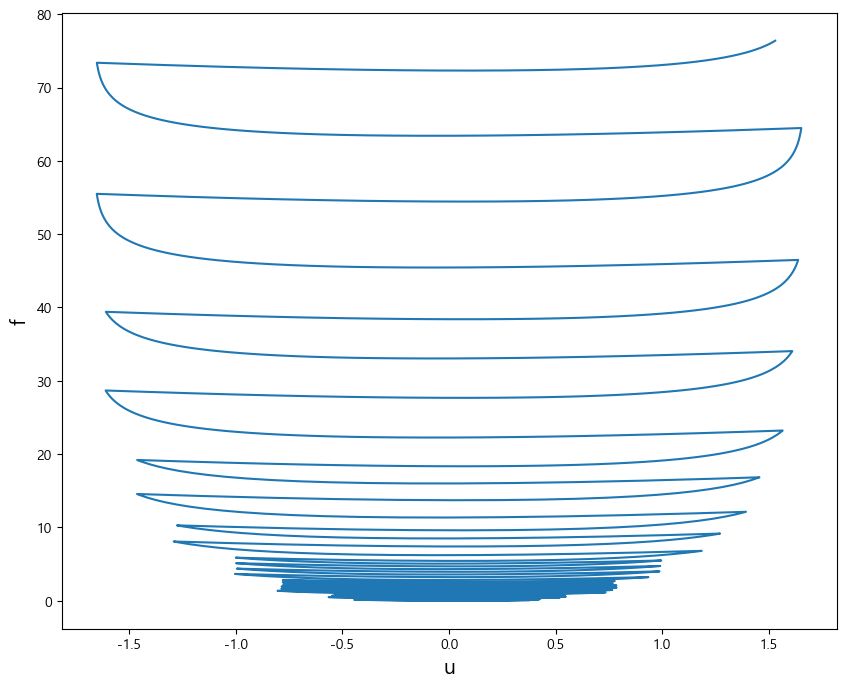

In [8]:
plt.figure(figsize = (10,8))
plt.plot(df_2['V2'], df_2['V3'])
plt.xlabel('u', fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.show()

In [9]:
def eval_inc(z, dx, gamma, beta, alpha, n):
    psi = gamma + beta * np.sign(dx * z)
    dz = dx * (1-abs(z)**n * psi)
    df = (1-alpha) * dx + alpha * dz
    de = z * dx

    return dz, df, de

In [10]:
result_matrix = np.zeros((len(df_2), 4)) # z, x, f, e

In [11]:
for i in range(len(result_matrix)-1):
    res = eval_inc(result_matrix[i,1], dx[i], 0.1, 0.5, 0.001, 1)

    result_matrix[i+1,0] = result_matrix[i,0] + dx[i] # u
    result_matrix[i+1,1] = result_matrix[i,1] + res[0] # z
    result_matrix[i+1,2] = result_matrix[i,2] + res[1] # f
    result_matrix[i+1,3] = result_matrix[i,3] + res[2] # e


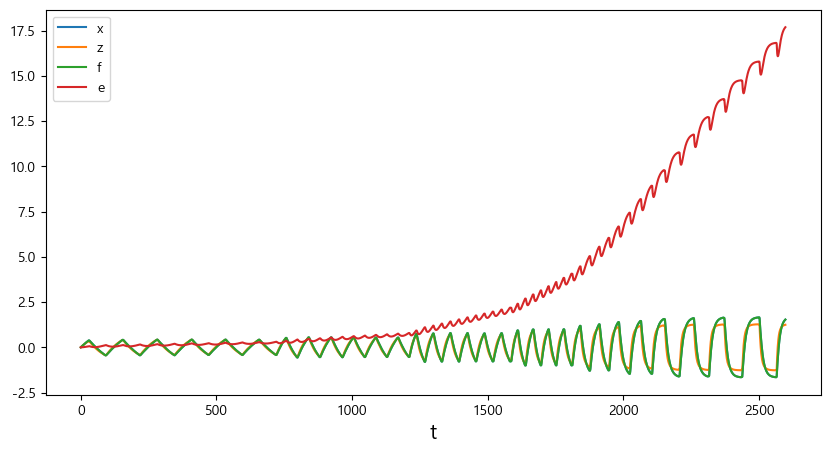

In [12]:
plt.figure(figsize = (10, 5))
plt.plot(result_matrix[:,0], label = 'x')
plt.plot(result_matrix[:,1], label = 'z')
plt.plot(result_matrix[:,2], label = 'f')
plt.plot(result_matrix[:,3], label = 'e')
plt.legend()
plt.xlabel('t', fontsize = 15)
plt.show()

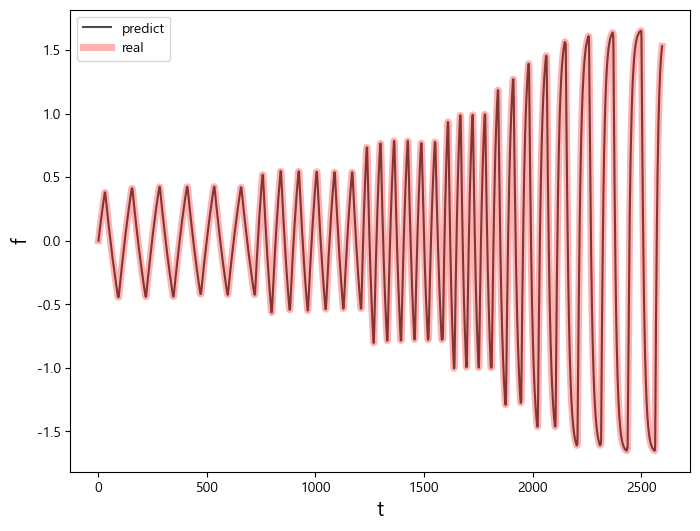

In [13]:
plt.figure(figsize = (8, 6))
plt.plot(result_matrix[:,2], label = 'predict', color = 'k',alpha = 0.7)
df_2.iloc[:,2].plot(label = 'real', alpha = 0.3, color = 'r', linewidth = 5)
plt.legend()
plt.xlabel('t', fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.show()

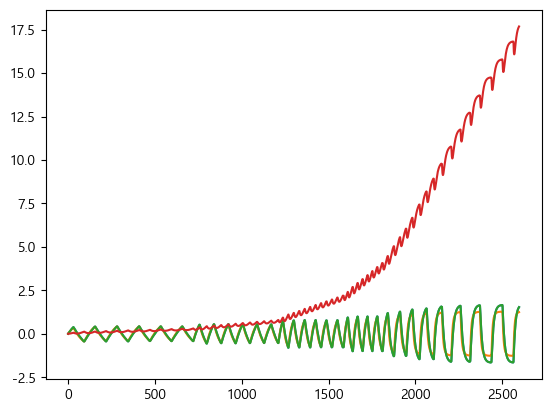

In [14]:
plt.plot(result_matrix[:,])

-----

In [15]:
df = make_data(dt = 1, total_time = 10000)

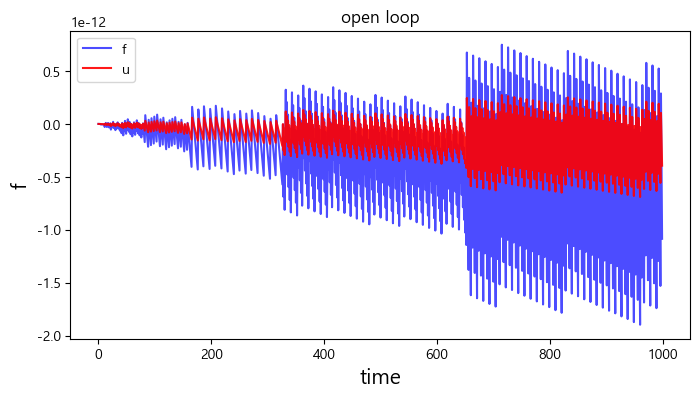

In [16]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.f[:1000], label = 'f', color = 'blue', alpha = 0.7)
plt.plot(df.u[:1000], label = 'u', color = 'red', alpha = 0.9)

plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.legend()
plt.show()

In [17]:
df.f

0        0.000000e+00
1       -5.551115e-17
2       -1.665335e-16
3       -3.330669e-16
4       -4.496403e-15
             ...     
9996    -9.936274e-12
9997     1.885270e-12
9998    -6.306122e-12
9999    -1.449346e-11
10000   -2.671918e-12
Name: f, Length: 10001, dtype: float64

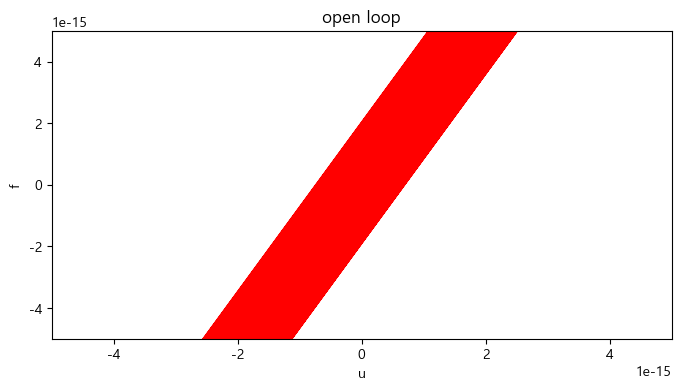

In [18]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.u, df.f, color = 'red')
plt.ylim(-0.5*1e-14, 0.5*1e-14)
plt.xlim(-0.5*1e-14, 0.5*1e-14)
plt.ylabel('f')
plt.xlabel('u')
plt.show()

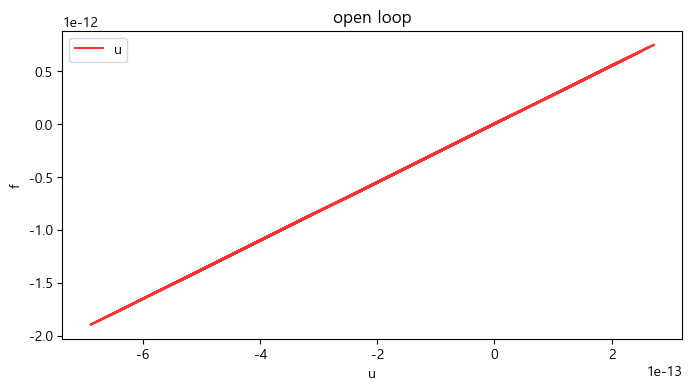

In [19]:
plt.figure(figsize=(8,4))
plt.title('open loop')
plt.plot(df.u[:1000], df.f[:1000], alpha = 0.8, label = 'u', color = 'red')
plt.ylabel('f')
plt.xlabel('u')
plt.legend()
plt.show()

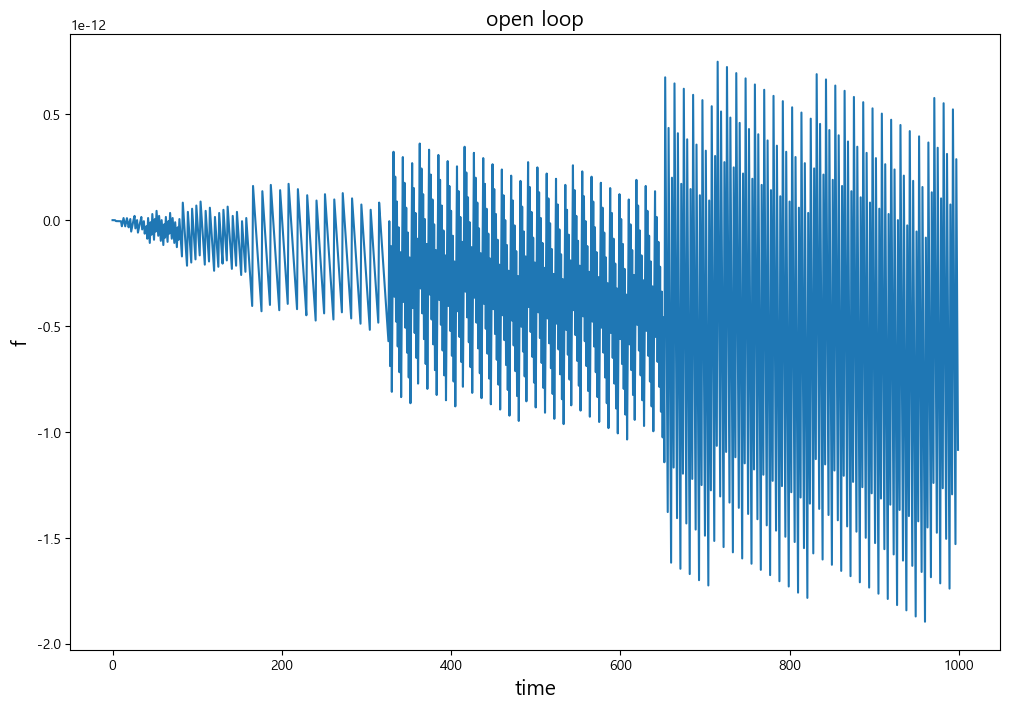

In [20]:
plt.figure(figsize=(12,8))
plt.title('open loop', fontsize = 15)
plt.plot(df.f[:1000])
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

In [21]:
train_df = df[:6000]
test_df = df[6000:]

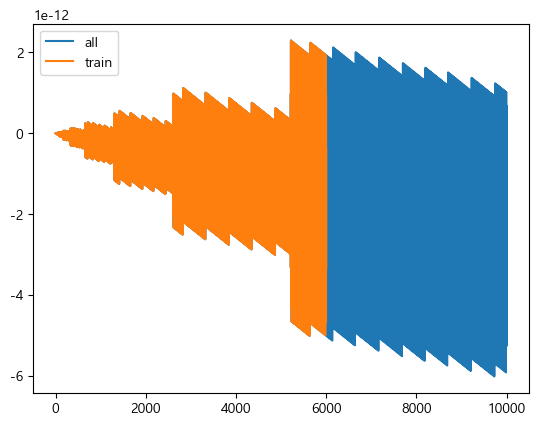

In [22]:
plt.plot(df.u)
plt.plot(train_df.u)
plt.legend(['all', 'train'])

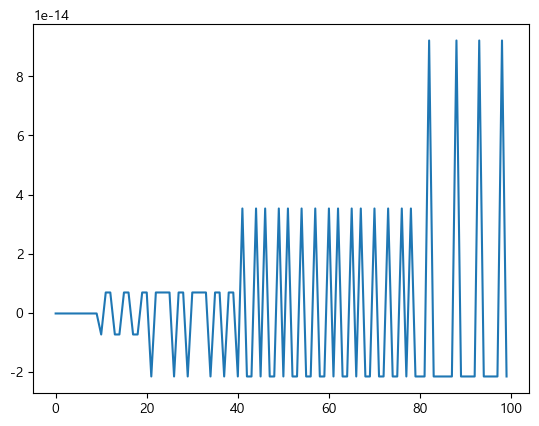

In [23]:
plt.plot(np.diff(df.u, axis=0)[:100])

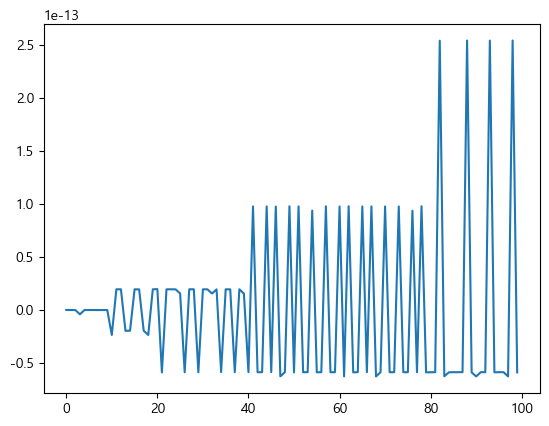

In [24]:
plt.plot(np.diff(df.f, axis=0)[:100])

In [25]:
d_x = np.diff(df.u, axis=0)

In [26]:
train_dx = d_x[:6000]
test_dx = d_x[6000:]

In [27]:
from pyswarm import pso

In [28]:
def objective_function(params, dx, target_df):
    gamma, beta, alpha, n, z = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(z, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [29]:
lb = [-10, -10, -10, -10, -10] 
ub = [10, 10, 10, 10, 10]

args = (train_dx, np.append(np.diff(train_df['f'], axis=0),0))

In [30]:
optimized_params, _ = pso(objective_function, lb, ub, maxiter=100, args = args, debug = True, minstep=1e-10)

No constraints given.
New best for swarm at iteration 1: [10.          0.88934368 -5.08599869 -5.02559365 -2.13168461] 2.5917211229175077e-05
Best after iteration 1: [10.          0.88934368 -5.08599869 -5.02559365 -2.13168461] 2.5917211229175077e-05
New best for swarm at iteration 2: [10.         -3.31706892 -9.09730335 -7.84249376  1.67703399] 2.201112808805466e-05
New best for swarm at iteration 2: [ 7.77129294  0.34408215 -0.2701452  -0.29961672  2.07653325] 3.1798266309460306e-06
Best after iteration 2: [ 7.77129294  0.34408215 -0.2701452  -0.29961672  2.07653325] 3.1798266309460306e-06
Best after iteration 3: [ 7.77129294  0.34408215 -0.2701452  -0.29961672  2.07653325] 3.1798266309460306e-06
Best after iteration 4: [ 7.77129294  0.34408215 -0.2701452  -0.29961672  2.07653325] 3.1798266309460306e-06
Best after iteration 5: [ 7.77129294  0.34408215 -0.2701452  -0.29961672  2.07653325] 3.1798266309460306e-06
Best after iteration 6: [ 7.77129294  0.34408215 -0.2701452  -0.29961672  

In [31]:
optimized_params

array([ 6.12986427e+00, -1.91923467e-03, -4.16237087e+00, -2.61935084e+00,
       -2.78182153e+00])

In [32]:
gamma, beta, alpha, n, z = optimized_params

In [33]:
result_matrix_2 = np.zeros((len(df), 4)) # z, x, f, e

In [34]:
for i in range(len(result_matrix_2)-1):
    res = eval_inc(z, d_x[i], gamma, beta, alpha, n)

    result_matrix_2[i+1,0] = result_matrix_2[i,0] + d_x[i] # x
    result_matrix_2[i+1,1] = result_matrix_2[i,1] + res[0] # z
    result_matrix_2[i+1,2] = result_matrix_2[i,2] + res[1] # f
    result_matrix_2[i+1,3] = result_matrix_2[i,3] + res[2] # e


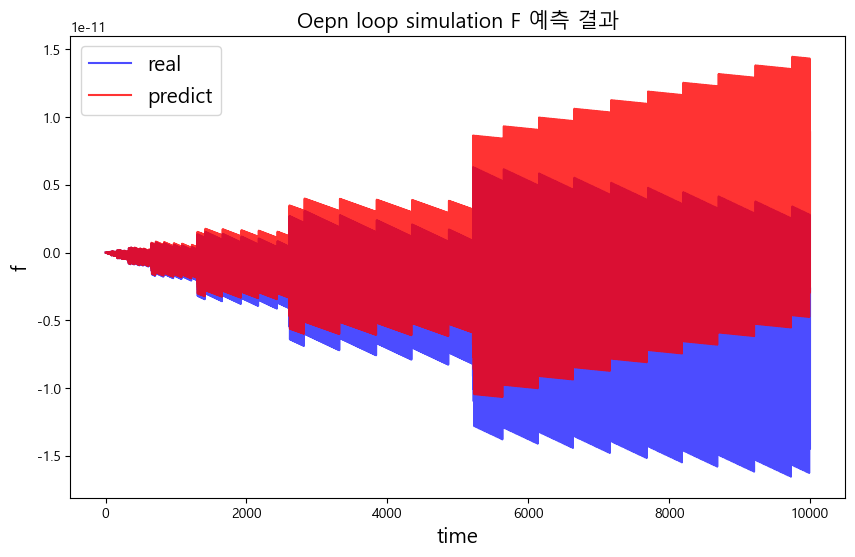

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)), df.f, color = 'blue', alpha = 0.7, label = 'real')
plt.plot(range(len(df)),result_matrix_2[:,2], color = 'red', alpha = 0.8, label = 'predict')
plt.title('Oepn loop simulation F 예측 결과', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

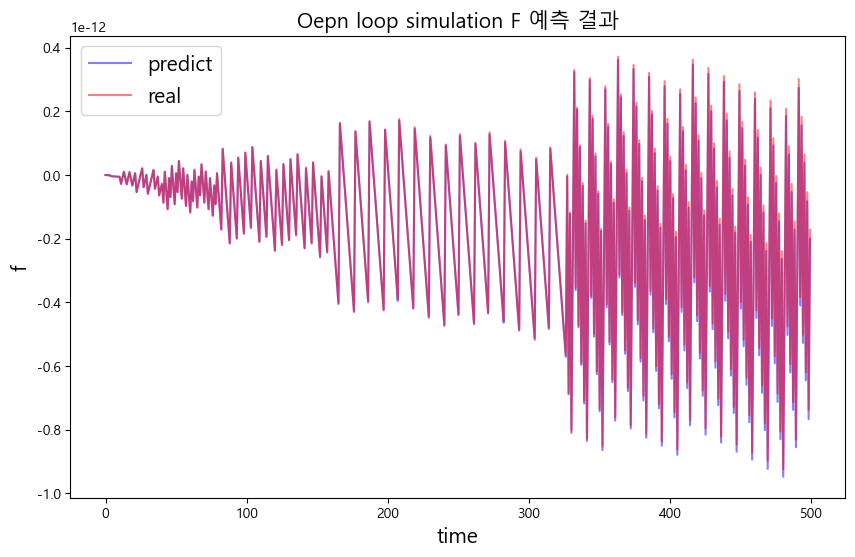

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(500), df.f[:500], color = 'blue', alpha = 0.5)
plt.plot(range(500),result_matrix_2[:500,2], color = 'red', alpha = 0.5)
plt.title('Oepn loop simulation F 예측 결과', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

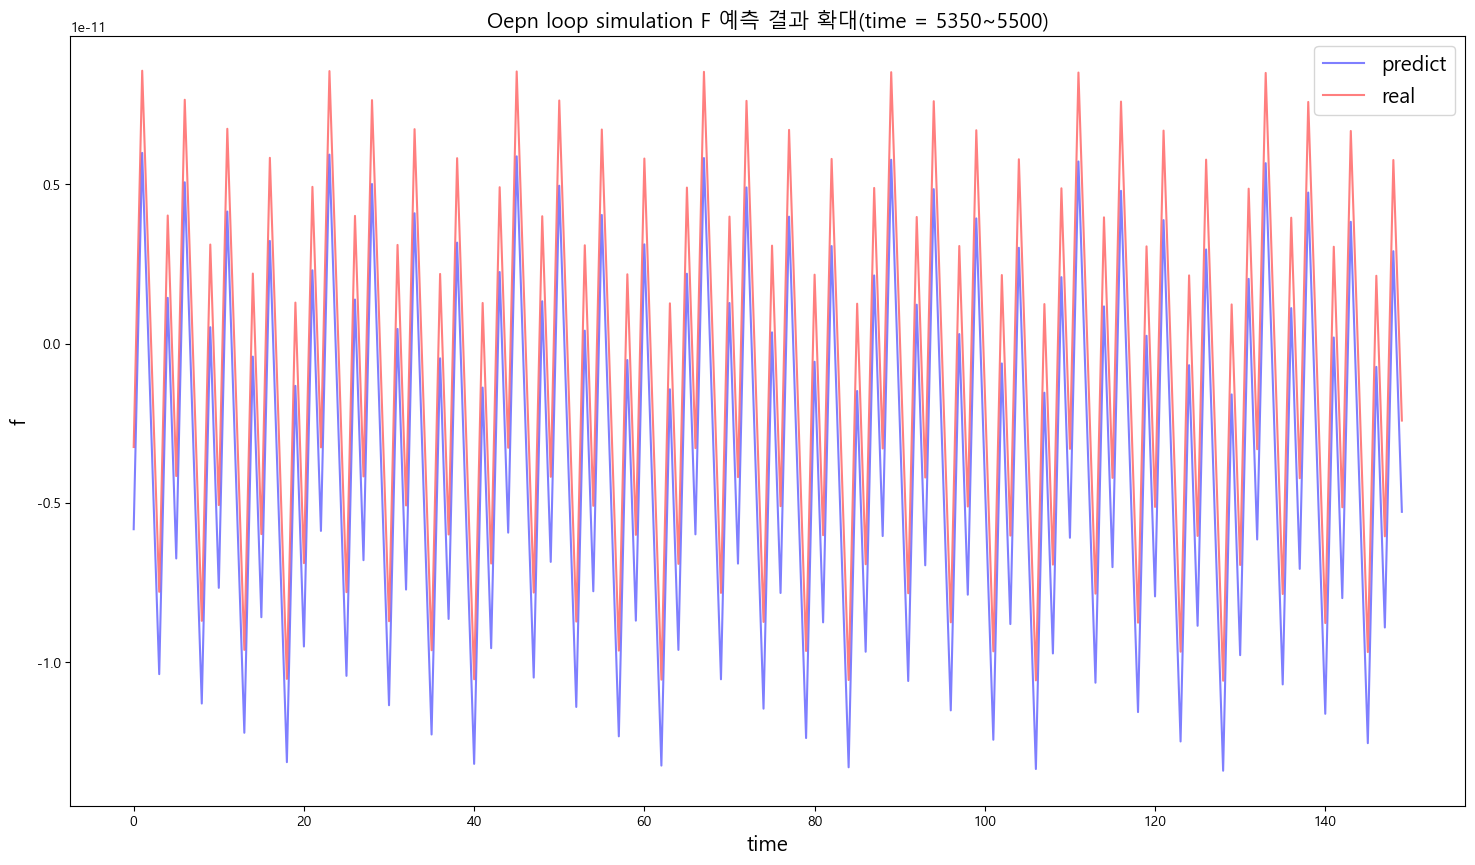

In [37]:
plt.figure(figsize=(18,10))
plt.plot(range(150), df.f[5350:5500], color = 'blue', alpha = 0.5)
plt.plot(range(150),result_matrix_2[5350:5500,2], color = 'red', alpha = 0.5)
plt.title('Oepn loop simulation F 예측 결과 확대(time = 5350~5500)', fontsize = 15)
plt.legend(['predict', 'real'], fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

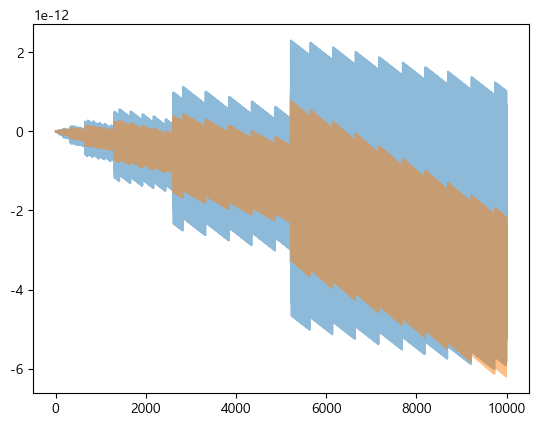

In [38]:
plt.plot(result_matrix_2[:,0], label = 'z', alpha = 0.5)
plt.plot(result_matrix_2[:,1], label = 'u', alpha = 0.5)

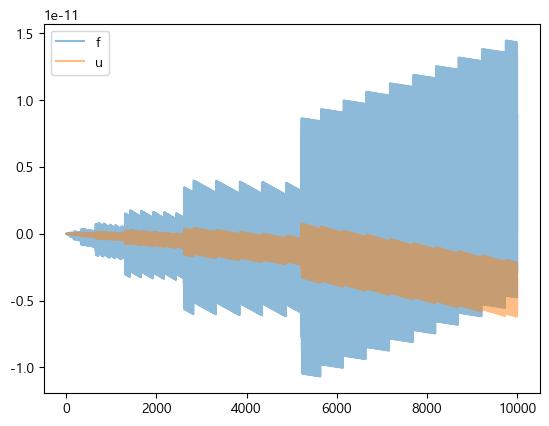

In [39]:
plt.plot(result_matrix_2[:,2], label = 'f', alpha = 0.5)
plt.plot(result_matrix_2[:,1], label = 'u', alpha = 0.5)
plt.legend()
plt.show()


In [40]:
import tensorflow as tf
from tensorflow.keras import layers

In [41]:
pred_u_model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


In [42]:
pred_u_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
mn = MinMaxScaler()

In [45]:
traind_mn = mn.fit_transform(train_df.u.values.reshape(-1,1))
testd_mn = mn.transform(test_df.u.values.reshape(-1,1))

train_f_mn = mn.fit_transform(train_df.f.values.reshape(-1,1))
test_f_mn = mn.transform(test_df.f.values.reshape(-1,1))

In [46]:
pred_u_model.fit(traind_mn, train_f_mn, epochs=100, verbose=1)

Epoch 1/100


188/188 [==============================] - 1s 626us/step - loss: 0.0115 - mae: 0.0462 - mse: 0.0115
Epoch 2/100
188/188 [==============================] - 0s 626us/step - loss: 5.5042e-06 - mae: 7.3196e-04 - mse: 5.5042e-06
Epoch 3/100
188/188 [==============================] - 0s 615us/step - loss: 3.2954e-06 - mae: 5.8752e-04 - mse: 3.2954e-06
Epoch 4/100
188/188 [==============================] - 0s 610us/step - loss: 2.2696e-06 - mae: 4.7373e-04 - mse: 2.2696e-06
Epoch 5/100
188/188 [==============================] - 0s 610us/step - loss: 1.5122e-06 - mae: 3.6044e-04 - mse: 1.5122e-06
Epoch 6/100
188/188 [==============================] - 0s 619us/step - loss: 1.0264e-06 - mae: 2.9935e-04 - mse: 1.0264e-06
Epoch 7/100
188/188 [==============================] - 0s 599us/step - loss: 6.9518e-07 - mae: 2.5095e-04 - mse: 6.9518e-07
Epoch 8/100
188/188 [==============================] - 0s 669us/step - loss: 4.9534e-07 - mae: 2.3232e-04 - mse: 4.9534e-07
Epoch 9/100
188/188 [===========

In [47]:
pred_f = pred_u_model.predict(testd_mn)

126/126 [==============================] - 0s 480us/step


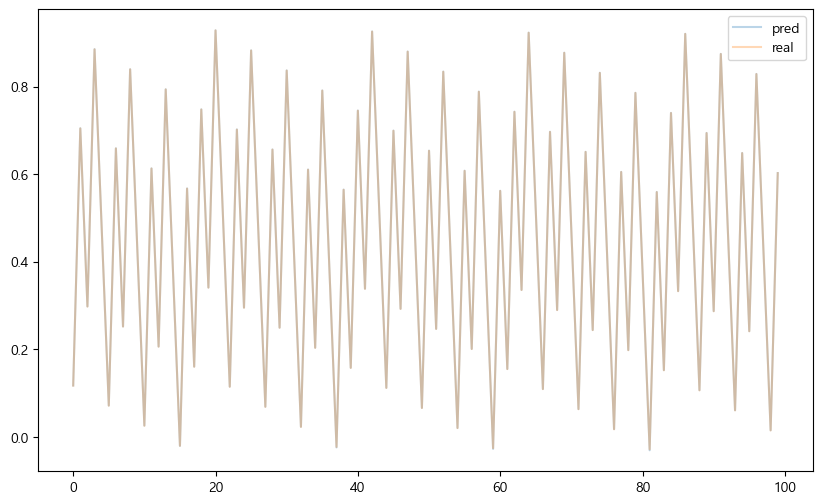

In [48]:
plt.figure(figsize = (10,6))
plt.plot(pred_f[900:1000], alpha = 0.3, label = 'pred')
plt.plot(test_f_mn[900:1000], alpha = 0.3, label = 'real')
plt.legend()
plt.show()

---------
-----------


In [49]:
close_df = make_data(dt = 0.01, total_time = 100)

In [50]:
close_df

,u,time,f
0,0.000000e+00,0.00,0.000000
1,6.279052e-02,0.01,0.152729
2,1.253332e-01,0.02,0.272857
3,1.873813e-01,0.03,0.369560
4,2.486899e-01,0.04,0.449713
...,...,...,...
9996,-2.486899e-01,99.96,0.299485
9997,-1.873813e-01,99.97,0.338637
9998,-1.253332e-01,99.98,0.375329
9999,-6.279052e-02,99.99,0.410222


In [51]:
close_df_train = close_df[:6000]
close_df_test = close_df[6000:]

In [52]:
close_dx = np.diff(close_df.u, axis=0)

In [53]:
train_close_dx = close_dx[:6000]
test_close_dx = close_dx[6000:]

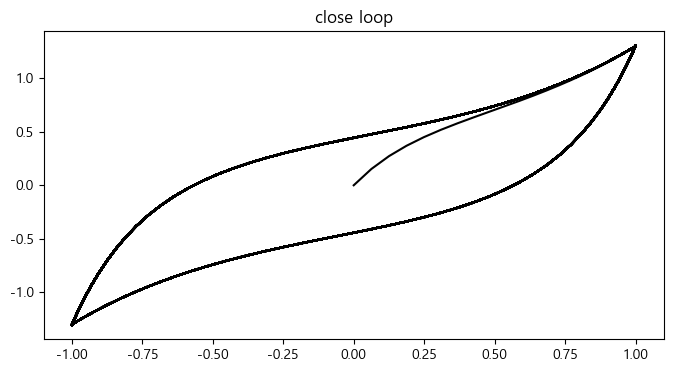

In [54]:
plt.figure(figsize=(8,4))
plt.title('close loop')
plt.plot(close_df.u, close_df.f, color = 'k')
plt.show()

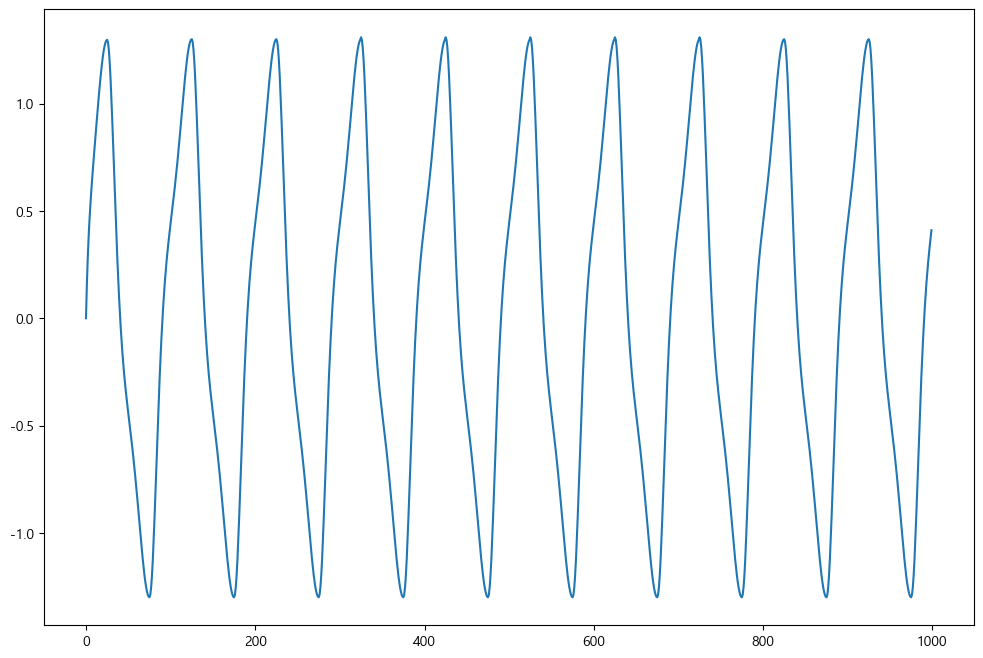

In [55]:
plt.figure(figsize=(12,8))
plt.plot(close_df.f[:1000])

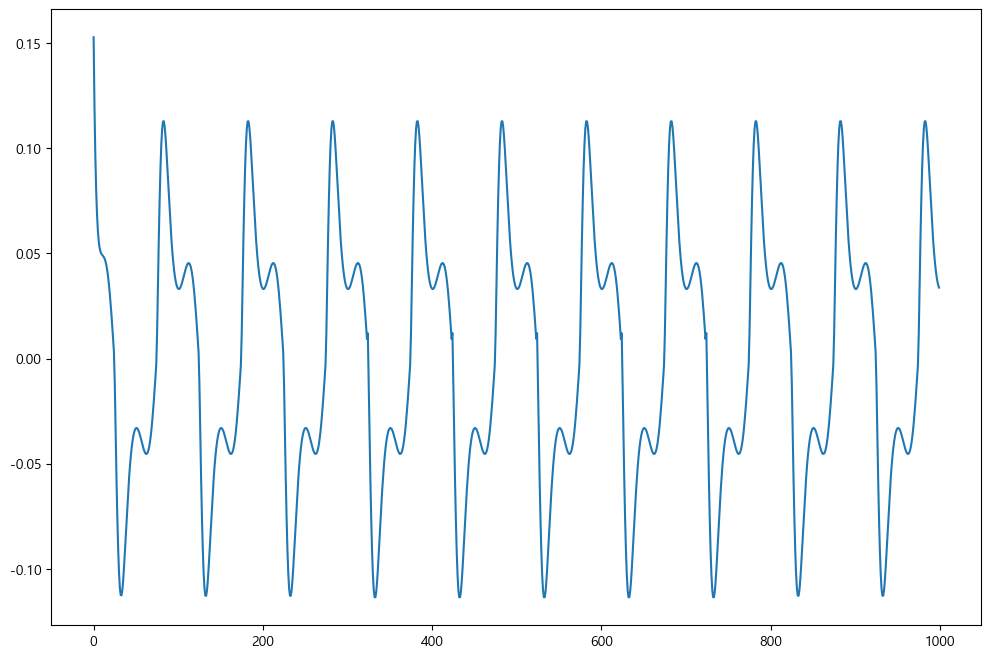

In [56]:
plt.figure(figsize=(12,8))
plt.plot(np.diff(close_df['f'], axis=0)[:1000])

In [57]:
target_df = np.append(np.diff(close_df_train['f'], axis=0),0)

In [58]:
args_2 = (train_close_dx, target_df)

In [59]:
def objective_function_2(params, dx, target_df):
    gamma, beta, alpha, z, n = params
    df_list = []
    for i in range(len(target_df)):
        _, df, _ = eval_inc(z, dx, gamma, beta, alpha, n)
        df_list.append(df)
    total_error = np.sum(np.abs(np.array(df_list) - np.array(target_df)))
    return total_error

In [60]:
lb_2 = [-10, -10, -10, -10, -10]
ub_2 = [10, 10, 10, 10, 10]

In [61]:
optimized_params_2, _ = pso(objective_function_2, lb_2, ub_2, maxiter=300, args = args_2, debug=True, swarmsize=10, phip = 0.7, phig = 0.7, minstep=1e-10)

No constraints given.


New best for swarm at iteration 1: [-0.31373954  2.7850347  -7.09980816 10.         -3.97407928] 966948.6585507523
New best for swarm at iteration 1: [-10.         -10.          -6.79110135  -6.9218283   -6.09033587] 966913.1364647736
Best after iteration 1: [-10.         -10.          -6.79110135  -6.9218283   -6.09033587] 966913.1364647736
Best after iteration 2: [-10.         -10.          -6.79110135  -6.9218283   -6.09033587] 966913.1364647736
New best for swarm at iteration 3: [-1.26291247 -2.55083768 -9.23258916  3.03395746 -5.19116238] 965955.6601148475
Best after iteration 3: [-1.26291247 -2.55083768 -9.23258916  3.03395746 -5.19116238] 965955.6601148475
New best for swarm at iteration 4: [-1.94500221  0.52529342 -4.91272112 -1.70041302 -8.75037213] 956530.3042735202
Best after iteration 4: [-1.94500221  0.52529342 -4.91272112 -1.70041302 -8.75037213] 956530.3042735202
Best after iteration 5: [-1.94500221  0.52529342 -4.91272112 -1.70041302 -8.75037213] 956530.3042735202
Best 

In [62]:
optimized_params_2

array([-1.77549359, -0.01305245, -5.04863094, -1.58044801, -9.47358002])

In [63]:
gamma_close, beta_close, alpha_close, close_z, close_n = optimized_params_2

In [64]:
result_matrix_3 = np.zeros((len(close_df), 4)) # z, x, f, e

In [65]:
for i in range(len(result_matrix_3)-1):
    res = eval_inc(close_z, close_dx[i], gamma_close, beta_close, alpha_close, close_n)

    result_matrix_3[i+1,0] = result_matrix_3[i,0] + close_dx[i] # x
    result_matrix_3[i+1,1] = result_matrix_3[i,1] + res[0] # z
    result_matrix_3[i+1,2] = result_matrix_3[i,2] + res[1] # f
    result_matrix_3[i+1,3] = result_matrix_3[i,3] + res[2] # e

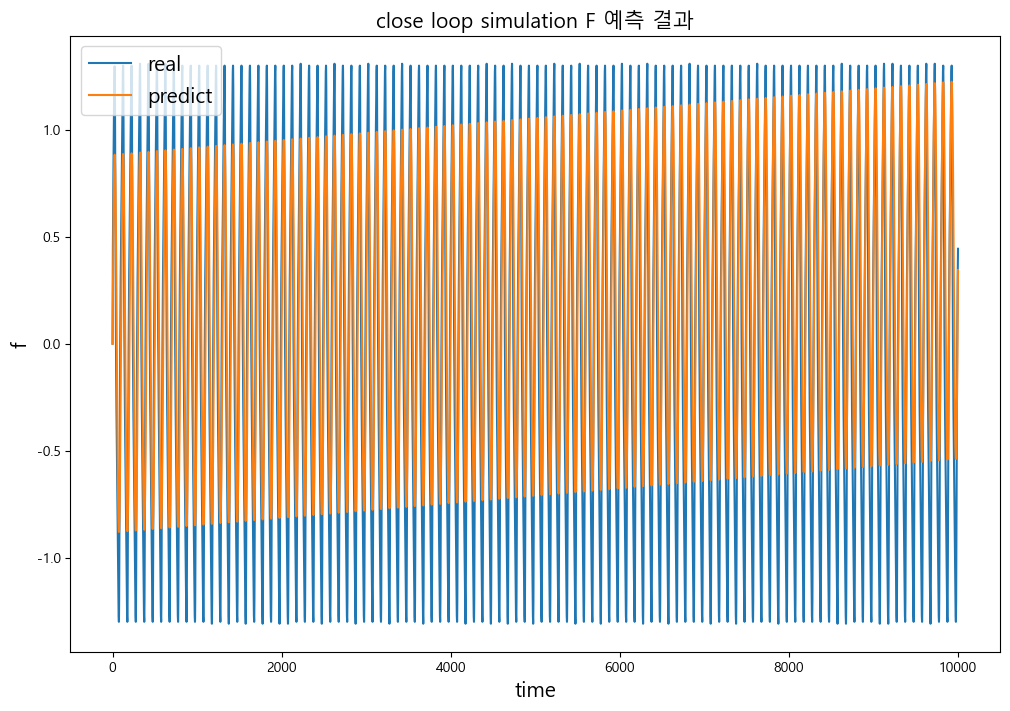

In [66]:
plt.figure(figsize=(12,8))
plt.plot(range(len(df)), close_df.f, label = 'real')
plt.plot(range(len(df)),result_matrix_3[:,2], label = 'predict')
plt.title('close loop simulation F 예측 결과', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

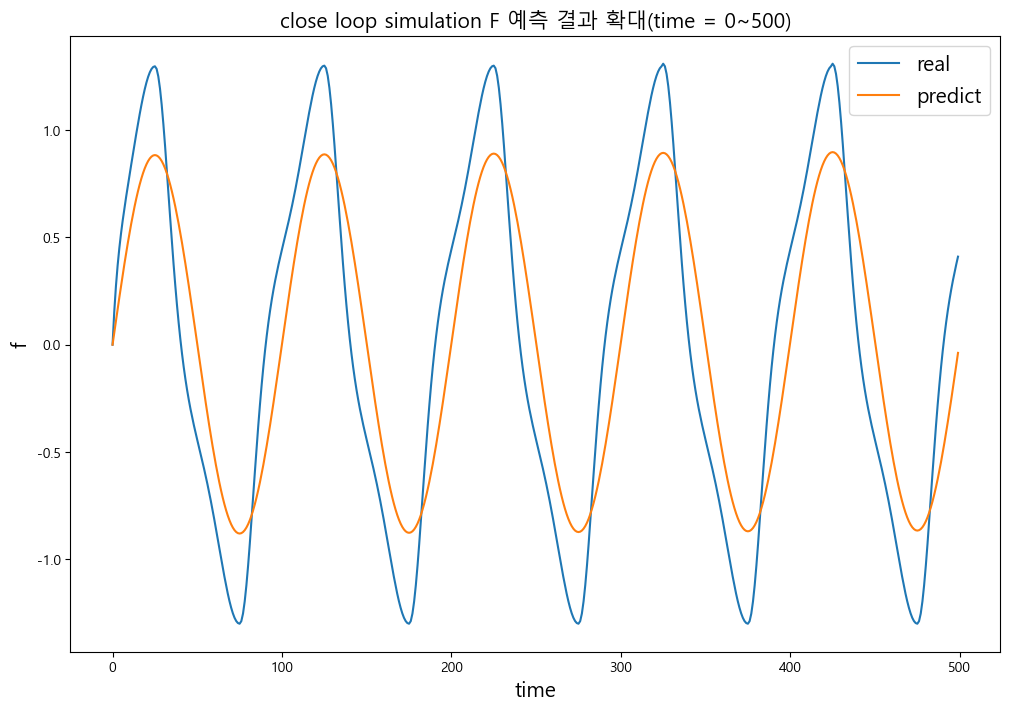

In [67]:
plt.figure(figsize=(12,8))
plt.plot(range(500), close_df.f[:500], label = 'real')
plt.plot(range(500),result_matrix_3[:,2][:500], label = 'predict')
plt.title('close loop simulation F 예측 결과 확대(time = 0~500)', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('f', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

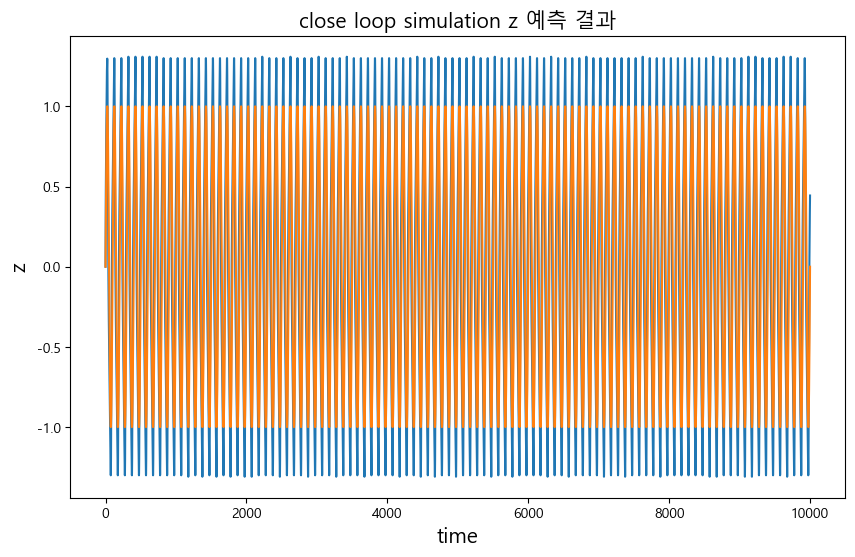

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(len(df)), close_df.f)

plt.plot(range(len(df)),result_matrix_3[:,0])

plt.title('close loop simulation z 예측 결과', fontsize = 15)
plt.ylabel('z', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

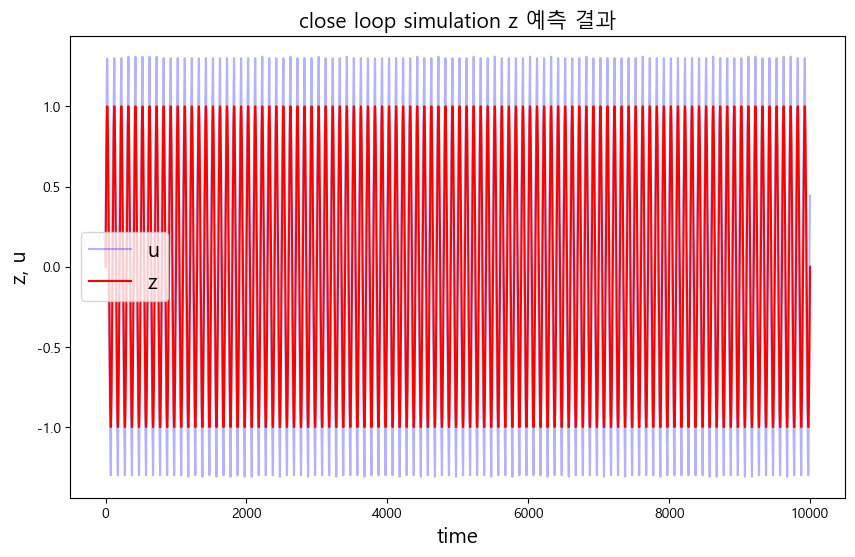

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(len(close_df)), close_df.f, label = 'u', color = 'b', alpha = 0.3)

plt.plot(range(len(close_df)),result_matrix_3[:,0], label = 'z', color = 'r')

plt.title('close loop simulation z 예측 결과', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('z, u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()

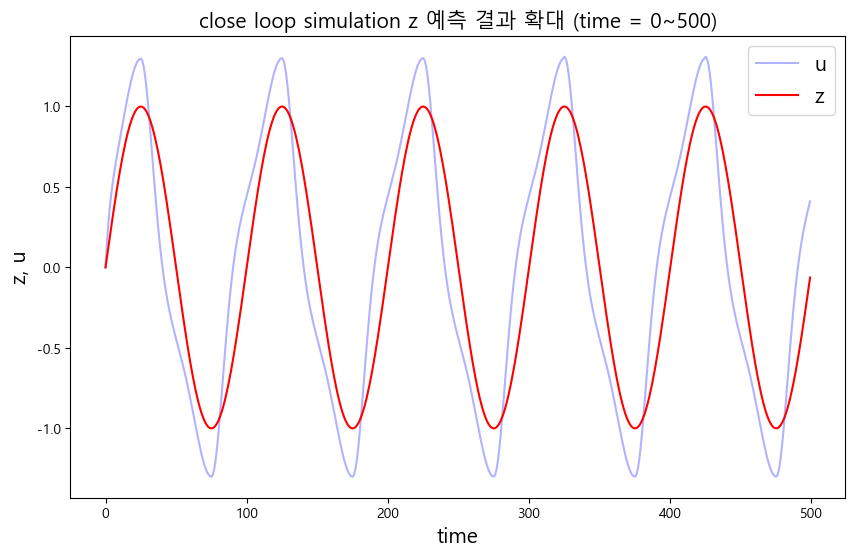

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(500), close_df.f[:500], label = 'u', color = 'b', alpha = 0.3)

plt.plot(range(500),result_matrix_3[:500,0], label = 'z', color = 'r')

plt.title('close loop simulation z 예측 결과 확대 (time = 0~500)', fontsize = 15)
plt.legend(fontsize = 15)
plt.ylabel('z, u', fontsize = 15)
plt.xlabel('time', fontsize = 15)
plt.show()